<a href="https://colab.research.google.com/github/Dzukito/Patient-charges-/blob/main/AnalisisExtra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd


# Plotly Packages
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


In [7]:
df = pd.read_csv("insurance.csv")
df.head()

# Guardamos una copia del original
original_df = df.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



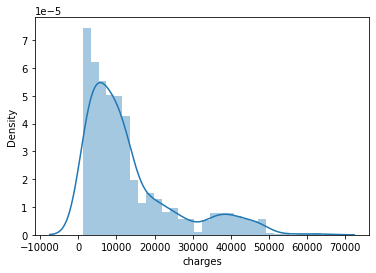

In [8]:
sns.distplot(original_df.charges)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



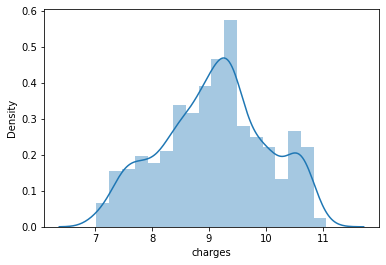

In [9]:
#Usando logaritmos: Logarithms helps us have a normal distribution which could help us in a number of different ways such as outlier detection, 
#implementation of statistical concepts based on the central limit theorem and for our predictive models.
sns.distplot(np.log(original_df.charges))

In [10]:
##############################################################################################################################################################################

In [11]:
#Analisis de la EDAD:
#Para este caso, vamos a encerrar la edad en 3 bins: Adultos jovenes, adultos y ancianos
df['age_cat'] = np.nan #creo una columna vacia
lst = [df]
for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

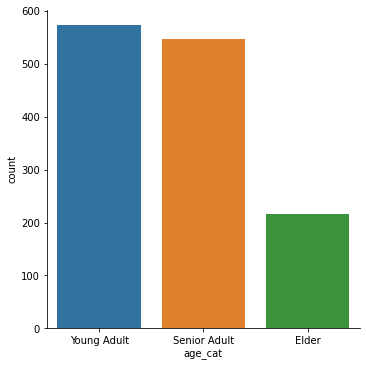

In [12]:
#Vemos cuantos de cada grupo etario tenemos:
sns.catplot(x="age_cat",data=df,kind="count",height=5, aspect=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



0    32.3
dtype: float64

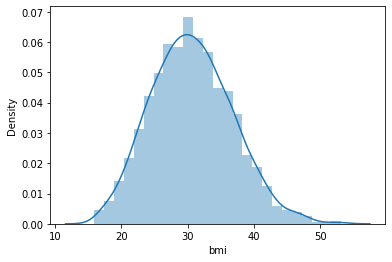

In [13]:
#Hay alguna relación entre la edad y el peso BMI?
#Vemos el BMI
sns.distplot(df.bmi)
df.bmi.mode()

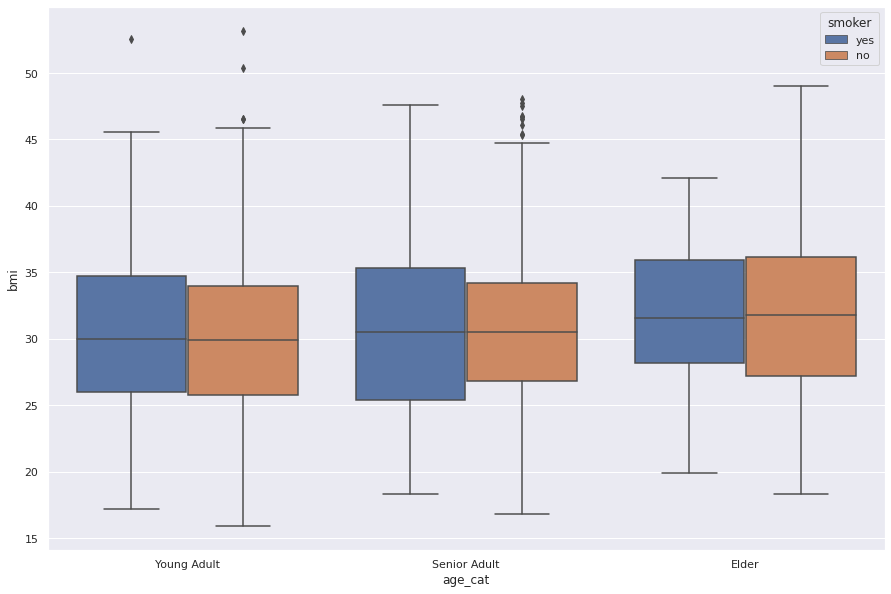

In [18]:
#Comparamos la edad, peso y condicion de fumador
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x="age_cat",y="bmi", hue="smoker",data=df)

In [19]:
##############################################################################################

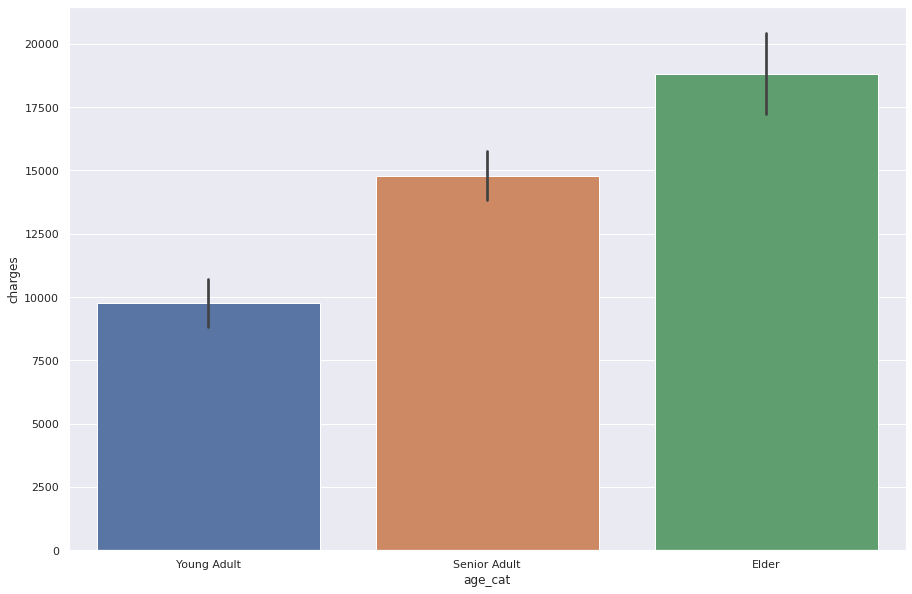

In [21]:
#A que rango etario se le cobran mas? (tomando la media)
sns.barplot(x="age_cat",y="charges",data=df)

In [22]:
#Para este caso tambien vamos a encerrar en bins a la variable BMI

#Under Weight: Body Mass Index (BMI)  <  18.5
#Normal Weight: Body Mass Index (BMI)  ≥  18.5 and Body Mass Index (BMI)  <  24.9
#Overweight: Body Mass Index (BMI)  ≥  25 and Body Mass Index (BMI)  <  29.9
#Obese: Body Mass Index (BMI)  >  30

df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


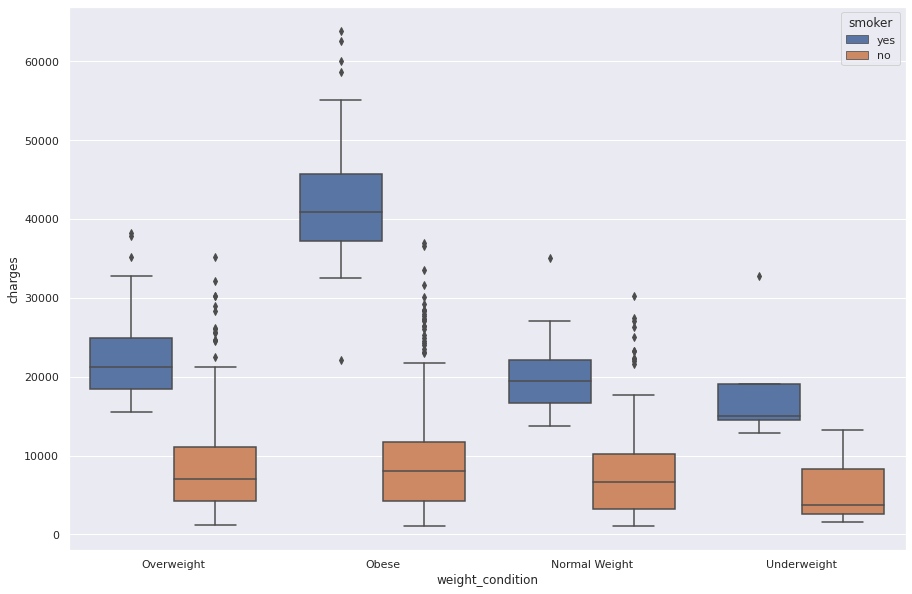

In [23]:
sns.boxplot(x="weight_condition",y="charges", hue="smoker",data=df)

In [24]:
#Interesante, confirma que ser obeso y fumador, asi como fumador y con sobrepeso hace que gastes mucho mas que el resto.